# HW1

### Q1

From the information given, we ccan know that $P(pass)=0.9$, $P(fail)=1-P(pass)=0.1$, $P(quick|pass)=0.6$, $P(quick|fail)=0.3$;

According to Law of Total Probability, $P(quick)=P(quick|pass)\cdot P(pass)+P(quick|fail)\cdot P(fail)=0.6\cdot 0.9+0.3\cdot 0.1=0.57$;

According to Bayes Formula, $P(pass|quick)=\frac{P(quick|pass)\cdot P(pass)}{P(quick)}=\frac{0.6\cdot 0.9}{0.57}=0.95$.

### Q2

Likelihood: $p(x|\theta,n)=\frac{n!}{\prod_{i=1}^{k}x_i!}\prod_{i=1}^k\theta_i^{x_i}=c\cdot\prod_{i=1}^k\theta_i^{x_i}$;

Prior: $p(\theta|\boldsymbol{\alpha})=\frac{1}{B(\boldsymbol{\alpha})}\prod_{i=1}^k\theta_i^{\alpha_i-1}=c'\cdot\prod_{i=1}^k\theta_i^{\alpha_i-1}$;

Joint Distribution: $p(x,\theta)=c\cdot c'\cdot\prod_{i=1}^k\theta_i^{x_i+\alpha_i-1}$;

Posterior: $p(\theta|\boldsymbol{x},n,\boldsymbol{\alpha})=\frac{p(x,\theta)}{c''}\propto\prod_{i=1}^k\theta_i^{x_i+\alpha_i-1}\sim Dir(\boldsymbol{x}+\boldsymbol{\alpha})$

### Q3

In [ ]:
! pip install python-ternary

In [1]:
from scipy import stats
import numpy as np
import ternary

np.random.seed(365)

In [2]:
mul = stats.multinomial(n=10, p=[0.2, 0.3, 0.5])
sample = mul.rvs(size=10)

In [3]:
def mul_pmf_10(n_i: list[float]) -> float:
    round_n_i = []
    for i in n_i:
        round_n_i.append(round(i * 10))
    return mul.pmf(round_n_i)

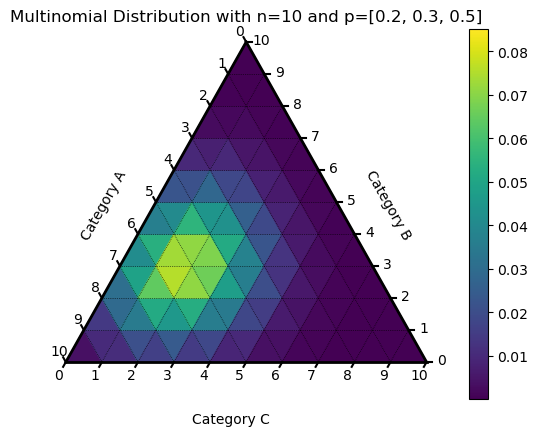

In [4]:
figure, tax = ternary.figure(scale=10)

tax.boundary(linewidth=2)
tax.gridlines(color="black", multiple=1)
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

tax.set_title("Multinomial Distribution with n=10 and p=[0.2, 0.3, 0.5]")
tax.left_axis_label("Category A", offset=0.15)
tax.right_axis_label("Category B", offset=0.15)
tax.bottom_axis_label("Category C", offset=0.15)
tax.ticks(axis='lbr', multiple=1, offset=0.015)

tax.heatmapf(mul_pmf_10)

ternary.plt.show()

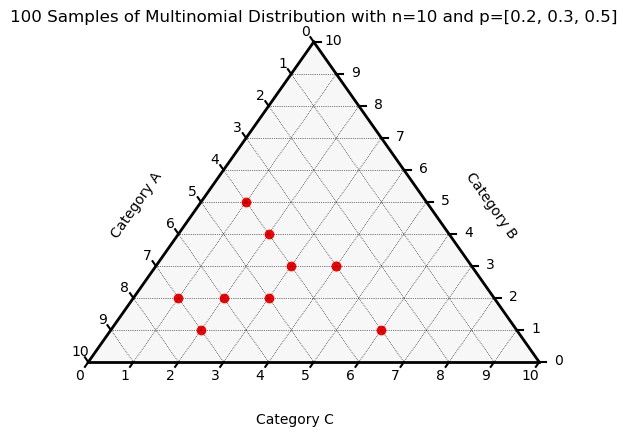

In [6]:
figure, tax = ternary.figure(scale=10)

tax.boundary(linewidth=2)
tax.gridlines(color="black", multiple=1)
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

tax.set_title("100 Samples of Multinomial Distribution with n=10 and p=[0.2, 0.3, 0.5]")
tax.left_axis_label("Category A", offset=0.15)
tax.right_axis_label("Category B", offset=0.15)
tax.bottom_axis_label("Category C", offset=0.15)
tax.ticks(axis='lbr', multiple=1, offset=0.015)

tax.scatter(sample, color="red")

ternary.plt.show()

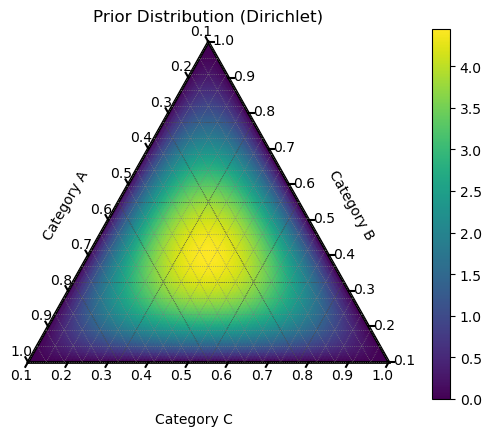

In [7]:
prior = stats.dirichlet(alpha=[2, 2, 2])

figure, tax = ternary.figure(scale=100)

tax.boundary(linewidth=2)
tax.gridlines(color="black", multiple=25)
tax.gridlines(color="grey", multiple=5, linewidth=0.5)
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

tax.set_title("Prior Distribution (Dirichlet)")
tax.left_axis_label("Category A", offset=0.15)
tax.right_axis_label("Category B", offset=0.15)
tax.bottom_axis_label("Category C", offset=0.15)
ticks = ["0.1", "0.2", "0.3", "0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]
tax.ticks(axis='lbr', ticks=ticks, multiple=10, offset=0.015)

tax.heatmapf(prior.pdf, scale=100)

ternary.plt.show()

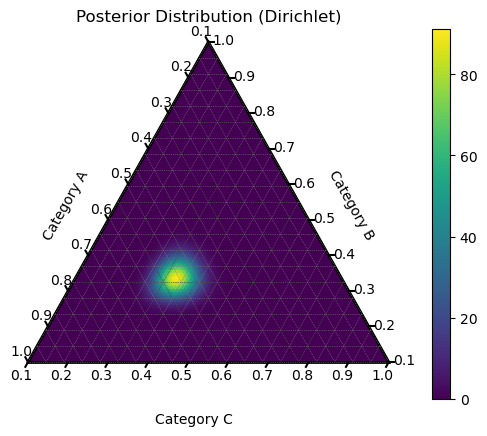

In [8]:
x1, x2, x3 = 0, 0, 0
for i in sample:
    x1 += i[0]
    x2 += i[1]
    x3 += i[2]

posterior = stats.dirichlet(alpha=[x1 + 2, x2 + 2, x3 + 2])

figure, tax = ternary.figure(scale=100)

tax.boundary(linewidth=2)
tax.gridlines(color="black", multiple=25)
tax.gridlines(color="grey", multiple=5, linewidth=0.5)
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

tax.set_title("Posterior Distribution (Dirichlet)")
tax.left_axis_label("Category A", offset=0.15)
tax.right_axis_label("Category B", offset=0.15)
tax.bottom_axis_label("Category C", offset=0.15)
ticks = ["0.1", "0.2", "0.3", "0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]
tax.ticks(axis='lbr', ticks=ticks, multiple=10, offset=0.015)

tax.heatmapf(posterior.pdf, scale=100)

ternary.plt.show()